## **Market Price Prediction**

**Objective:**

The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.

In [37]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
import xgboost as xgb


In [2]:
# Loading dataset
df = pd.read_csv('D:\Machine Learning Bootcamp\---Courses & Internships---\Mentorness Internship\Market price prediction\MarketPricePrediction.csv')
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


**Data Preprocessing**

In [3]:
#Finding no. of rows and columns
df.shape

(10227, 10)

In [4]:
# For dataset information
df.info

<bound method DataFrame.info of            market     month  year  quantity  priceMin  priceMax  priceMod  \
0      ABOHAR(PB)   January  2005      2350       404       493       446   
1      ABOHAR(PB)   January  2006       900       487       638       563   
2      ABOHAR(PB)   January  2010       790      1283      1592      1460   
3      ABOHAR(PB)   January  2011       245      3067      3750      3433   
4      ABOHAR(PB)   January  2012      1035       523       686       605   
...           ...       ...   ...       ...       ...       ...       ...   
10222   YEOLA(MS)  December  2011    131326       282       612       526   
10223   YEOLA(MS)  December  2012    207066       485      1327      1136   
10224   YEOLA(MS)  December  2013    215883       472      1427      1177   
10225   YEOLA(MS)  December  2014    201077       446      1654      1456   
10226   YEOLA(MS)  December  2015    223315       609      1446      1126   

      state    city           date  
0     

In [5]:
# For statistical summary
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [6]:
# Checking for null values
df.isnull()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10222,False,False,False,False,False,False,False,False,False,False
10223,False,False,False,False,False,False,False,False,False,False
10224,False,False,False,False,False,False,False,False,False,False
10225,False,False,False,False,False,False,False,False,False,False


In [7]:
# Checking for null value count
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

No null value in the dataset

In [8]:
# Converting date column in date time format
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

C:\Users\AYESHA QAMAR\AppData\Local\Temp\ipykernel_14796\3604111087.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0       2005-01-01
1       2006-01-01
2       2010-01-01
3       2011-01-01
4       2012-01-01
           ...    
10222   2011-12-01
10223   2012-12-01
10224   2013-12-01
10225   2014-12-01
10226   2015-12-01
Name: date, Length: 10227, dtype: datetime64[ns]


In [9]:
# Converting Categorical values into numerical
label_encoder = {}
for column in ['market', 'state', 'city']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoder[column] = le

In [10]:
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,0,January,2005,2350,404,493,446,16,0,2005-01-01
1,0,January,2006,900,487,638,563,16,0,2006-01-01
2,0,January,2010,790,1283,1592,1460,16,0,2010-01-01
3,0,January,2011,245,3067,3750,3433,16,0,2011-01-01
4,0,January,2012,1035,523,686,605,16,0,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
10222,119,December,2011,131326,282,612,526,14,116,2011-12-01
10223,119,December,2012,207066,485,1327,1136,14,116,2012-12-01
10224,119,December,2013,215883,472,1427,1177,14,116,2013-12-01
10225,119,December,2014,201077,446,1654,1456,14,116,2014-12-01


In [11]:
# Dropping duplicate column
df = df.drop('month', axis = 1)

In [12]:
df

,market,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,0,2005,2350,404,493,446,16,0,2005-01-01
1,0,2006,900,487,638,563,16,0,2006-01-01
2,0,2010,790,1283,1592,1460,16,0,2010-01-01
3,0,2011,245,3067,3750,3433,16,0,2011-01-01
4,0,2012,1035,523,686,605,16,0,2012-01-01
...,...,...,...,...,...,...,...,...,...
10222,119,2011,131326,282,612,526,14,116,2011-12-01
10223,119,2012,207066,485,1327,1136,14,116,2012-12-01
10224,119,2013,215883,472,1427,1177,14,116,2013-12-01
10225,119,2014,201077,446,1654,1456,14,116,2014-12-01


**EDA**

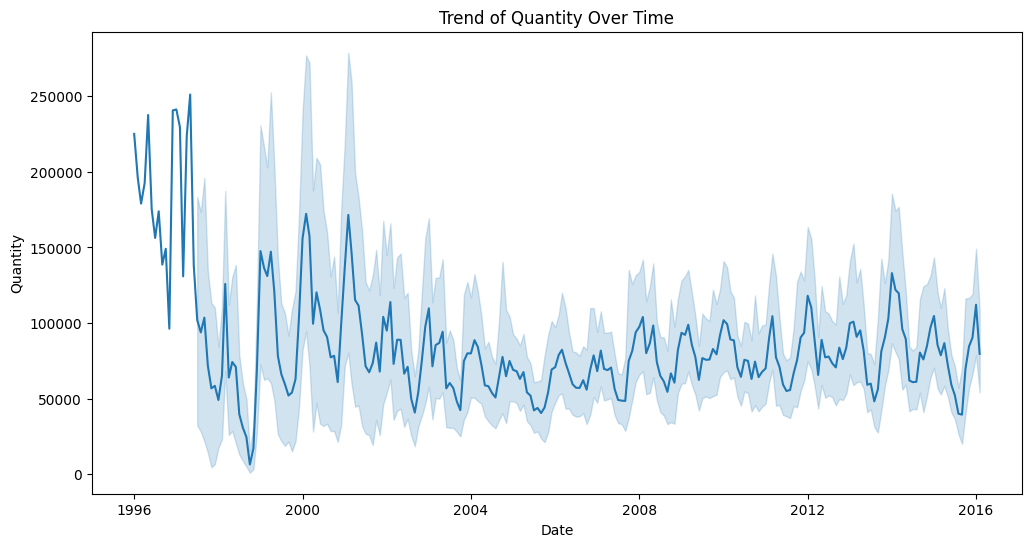

In [13]:
# Plot the trend of quantity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='quantity', data=df)
plt.title('Trend of Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

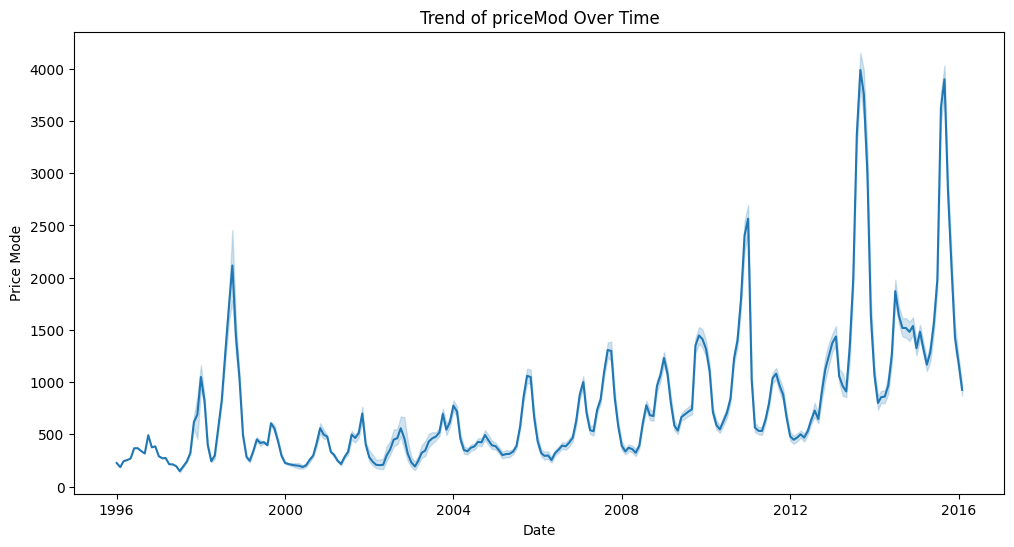

In [14]:
# Plot the trend of priceMod over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='priceMod', data=df)
plt.title('Trend of priceMod Over Time')
plt.xlabel('Date')
plt.ylabel('Price Mode')
plt.show()

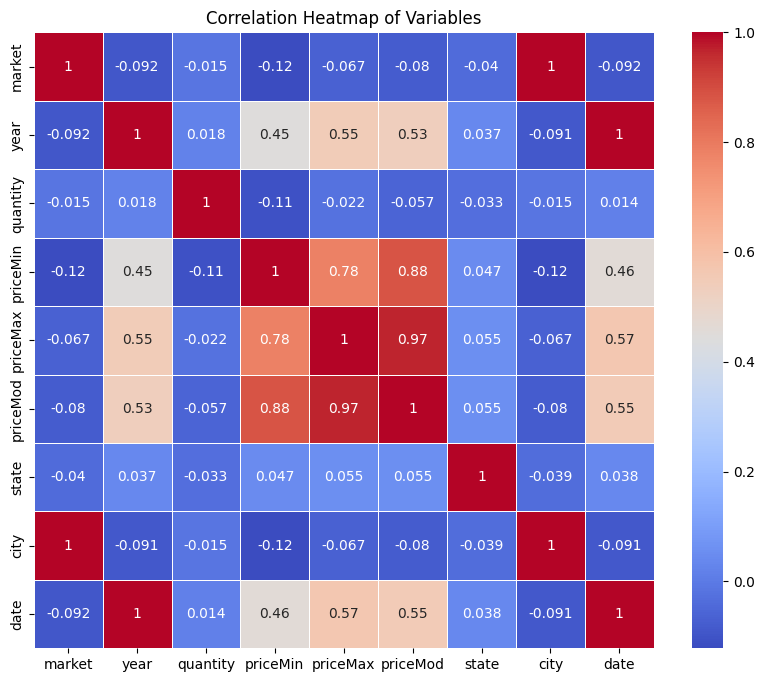

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

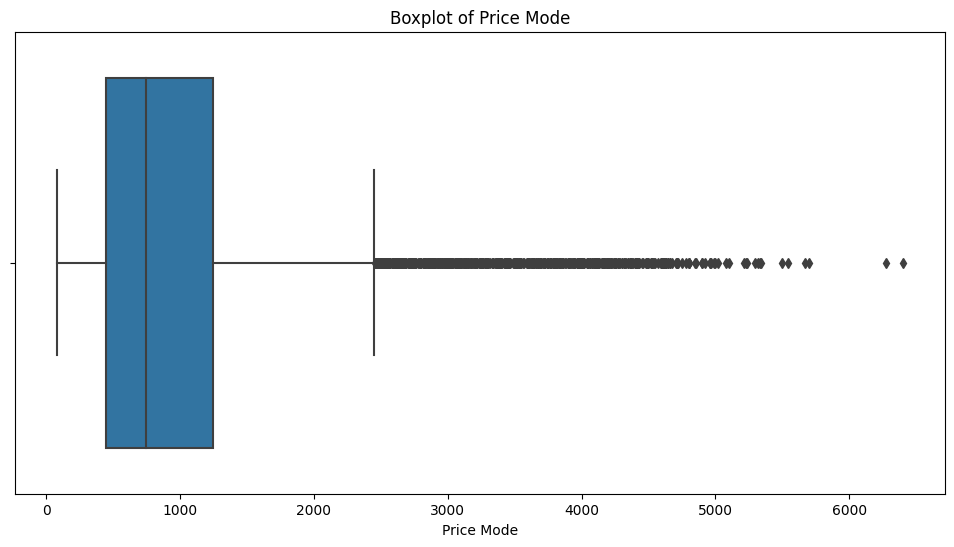

In [16]:
# Identifying Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='priceMod', data=df)
plt.title('Boxplot of Price Mode')
plt.xlabel('Price Mode')
plt.show()

In [17]:
# Z-score method for outlier detection
from scipy import stats
df['priceMod_zscore'] = stats.zscore(df['priceMod'])
outliers = df[df['priceMod_zscore'].abs() > 3]

print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 302


**Feature Engineering**

In [18]:
df['month'] = df['date'].dt.month
print(df['month'])

0         1
1         1
2         1
3         1
4         1
         ..
10222    12
10223    12
10224    12
10225    12
10226    12
Name: month, Length: 10227, dtype: int32


In [19]:
df['year'] = df['date'].dt.year
print(df['year'])

0        2005
1        2006
2        2010
3        2011
4        2012
         ... 
10222    2011
10223    2012
10224    2013
10225    2014
10226    2015
Name: year, Length: 10227, dtype: int32


In [20]:
# Create lag features
df['quantity_lag1'] = df['quantity'].shift(1)
print(df['quantity'])

0          2350
1           900
2           790
3           245
4          1035
          ...  
10222    131326
10223    207066
10224    215883
10225    201077
10226    223315
Name: quantity, Length: 10227, dtype: int64


In [21]:
df['quantity_lag2'] = df['quantity'].shift(2)
print(df['quantity_lag2'])

0             NaN
1             NaN
2          2350.0
3           900.0
4           790.0
           ...   
10222    112061.0
10223     57586.0
10224    131326.0
10225    207066.0
10226    215883.0
Name: quantity_lag2, Length: 10227, dtype: float64


In [22]:
# Create rolling mean features
df['quantity_roll_mean'] = df['quantity'].rolling(window=3).mean()
print(df['quantity_roll_mean'])

0                  NaN
1                  NaN
2          1346.666667
3           645.000000
4           690.000000
             ...      
10222    100324.333333
10223    131992.666667
10224    184758.333333
10225    208008.666667
10226    213425.000000
Name: quantity_roll_mean, Length: 10227, dtype: float64


In [23]:
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()
print(df['quantity_roll_std'])

0                 NaN
1                 NaN
2          870.651097
3          350.749198
4          404.382245
             ...     
10222    38245.377607
10223    74742.229919
10224    46483.282547
10225     7447.877170
10226    11320.931234
Name: quantity_roll_std, Length: 10227, dtype: float64


In [24]:
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()
print(df['quantity_roll_std'])

0                 NaN
1                 NaN
2          870.651097
3          350.749198
4          404.382245
             ...     
10222    38245.377607
10223    74742.229919
10224    46483.282547
10225     7447.877170
10226    11320.931234
Name: quantity_roll_std, Length: 10227, dtype: float64


In [25]:
# Drop missing values created by lag and rolling features
df.dropna(inplace=True)

In [26]:
df

,market,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMod_zscore,month,quantity_lag1,quantity_lag2,quantity_roll_mean,quantity_roll_std
2,0,2010,790,1283,1592,1460,16,0,2010-01-01,0.581253,1,900.0,2350.0,1346.666667,870.651097
3,0,2011,245,3067,3750,3433,16,0,2011-01-01,2.991962,1,790.0,900.0,645.000000,350.749198
4,0,2012,1035,523,686,605,16,0,2012-01-01,-0.463428,1,245.0,790.0,690.000000,404.382245
5,0,2013,675,1327,1900,1605,16,0,2013-01-01,0.758421,1,1035.0,245.0,651.666667,395.516540
6,0,2014,440,1025,1481,1256,16,0,2014-01-01,0.331996,1,675.0,1035.0,716.666667,299.680385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,119,2011,131326,282,612,526,14,116,2011-12-01,-0.559954,12,57586.0,112061.0,100324.333333,38245.377607
10223,119,2012,207066,485,1327,1136,14,116,2012-12-01,0.185374,12,131326.0,57586.0,131992.666667,74742.229919
10224,119,2013,215883,472,1427,1177,14,116,2013-12-01,0.235470,12,207066.0,131326.0,184758.333333,46483.282547
10225,119,2014,201077,446,1654,1456,14,116,2014-12-01,0.576365,12,215883.0,207066.0,208008.666667,7447.877170


**Model Building**

In [27]:
# Define the target and features
X = df[['quantity', 'quantity_lag1', 'quantity_lag2', 'quantity_roll_mean', 'quantity_roll_std', 'market', 'state', 'city', 'month', 'year']]
y = df['priceMod']

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Check the shapes of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8180, 10) (2045, 10) (8180,) (2045,)


In [30]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)


In [31]:
# Fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
# Make predictions
predictions = model.predict(X_test)

**Model Evaluation**

In [34]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 150.3215020401262


In [35]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')


Mean Squared Error (MSE): 60626.7851607632


In [36]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 246.2250701304869


In [42]:
# Calculate R-squared for the model
r2 = r2_score(y_test, predictions)
print(f'R-squared Score: {r2}')

R-squared Score: 0.9114364409925523
